## loading data 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data_path = "mv.csv"  # Replace with your CSV file path
df = pd.read_csv(data_path)



In [19]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


## calculating Average Movie Ratings by Year

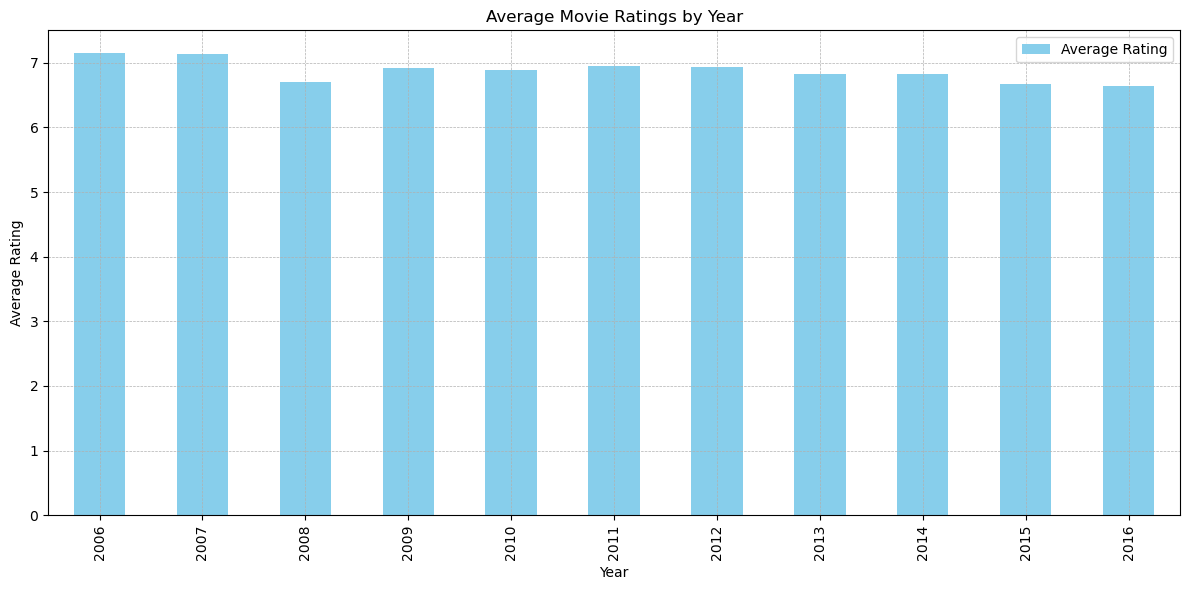

In [20]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Revenue (Millions)'] = pd.to_numeric(df['Revenue (Millions)'], errors='coerce')
df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce')
df.dropna(subset=['Year', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore'], inplace=True)
plt.figure(figsize=(12, 6))
df.groupby('Year')['Rating'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Movie Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(['Average Rating'], loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Calculating Total Movie Revenue by Year

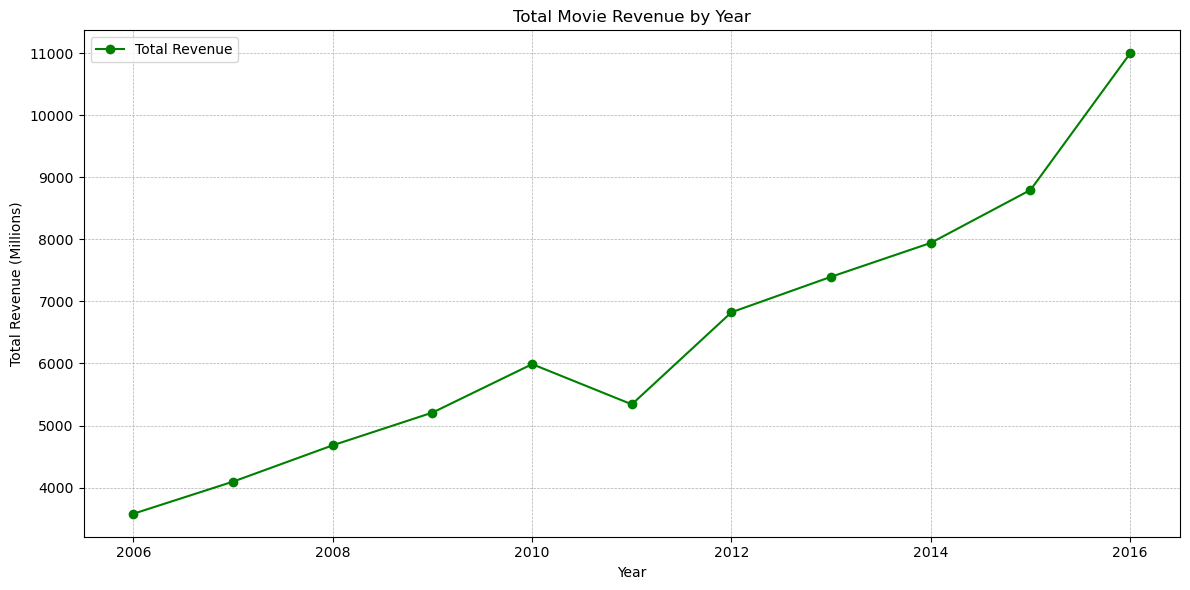

In [21]:
plt.figure(figsize=(12, 6))
df.groupby('Year')['Revenue (Millions)'].sum().plot(kind='line', marker='o', color='green')
plt.title('Total Movie Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue (Millions)')
plt.legend(['Total Revenue'], loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Top Genres by Number of Movies

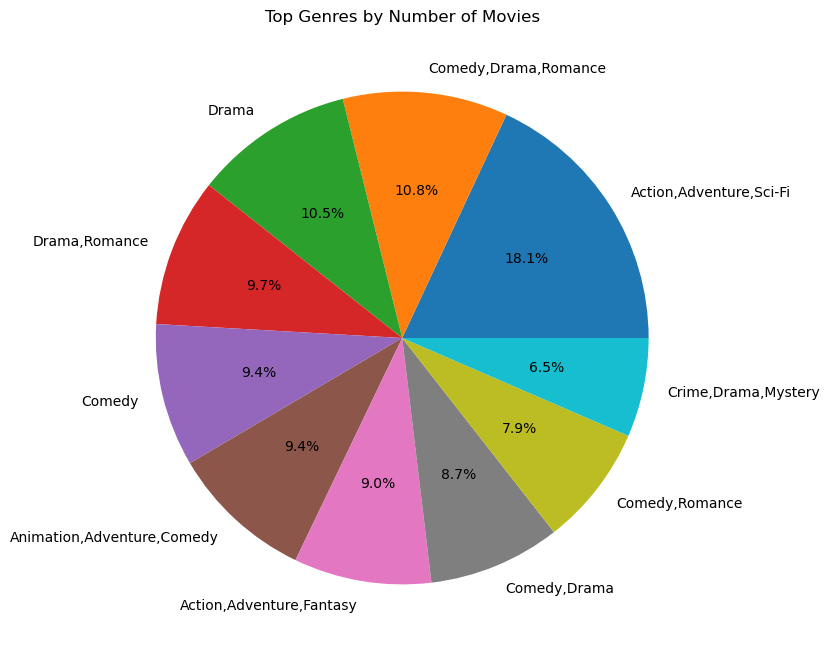

In [22]:
def clean_numeric_columns(df, cols):
  for col in cols:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')
  return df
top_genres = df["Genre"].value_counts().sort_values(ascending=False).head(10)

# Pie chart for top genres
plt.figure(figsize=(8, 8))
plt.pie(top_genres.values, labels=top_genres.index, autopct="%1.1f%%")
plt.title("Top Genres by Number of Movies")
plt.show()
